In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
gdata = sc.read_h5ad('./RNA/spatial.combined.bin100.h5')
gdata = gdata[:, gdata.var_names.str.startswith('sg')].copy()
gdata

AnnData object with n_obs × n_vars = 11622 × 64
    obs: 'marker'
    obsm: 'spatial'

In [30]:
guide_data = sc.read_h5ad('../20240502-SPACseq/RNA/Multitime.guide.h5')
guide_data[:, guide_data[guide_data.obs.marker == '3-2'].X.toarray().sum(axis=0) == 0].var_names

Index(['sgPiezo1_1_gene'], dtype='object')

In [12]:
gdata[:, gdata[gdata.obs.marker == 'B'].X.toarray().sum(axis=0) == 0].var_names

Index([], dtype='object')

In [2]:
fdata = sc.read_h5ad('./RNA/reclustered.h5')
# fdata = sc.read_h5ad('./RNA/spatial.combined.h5')
fdata

AnnData object with n_obs × n_vars = 8441 × 13800
    obs: 'marker', 'n_counts', 'n_genes', 'x', 'y', '_scvi_batch', '_scvi_labels', 'cluster'
    var: 'mt', 'mt-', 'gm', 'Rb', 'rik'
    uns: '_cellcharter', '_scvi_manager_uuid', '_scvi_uuid', 'cluster_colors', 'log1p', 'spatial_neighbors'
    obsm: 'X_cellcharter', 'X_scVI', 'spatial'
    layers: 'counts'
    obsp: 'spatial_connectivities', 'spatial_distances'

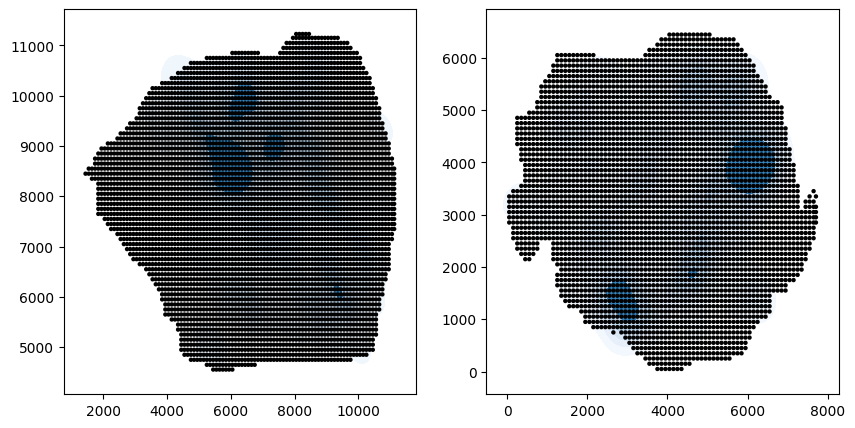

In [40]:
a_data = gdata[fdata[fdata.obs.marker == 'A'].obs_names, :]
b_data = gdata[fdata[fdata.obs.marker == 'B'].obs_names, :]

_, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(x=a_data.obsm['spatial'][:, 0], y=a_data.obsm['spatial'][:, 1], weights=a_data.X.toarray().sum(axis=1), ax=ax[0], fill=True, cmap='Blues', levels=6, bw_adjust=0.4)
sns.kdeplot(x=b_data.obsm['spatial'][:, 0], y=b_data.obsm['spatial'][:, 1], weights=b_data.X.toarray().sum(axis=1), ax=ax[1], fill=True, cmap='Blues', levels=6, bw_adjust=0.4)
sns.scatterplot(x=a_data.obsm['spatial'][:, 0], y=a_data.obsm['spatial'][:, 1], s=10, edgecolor='none', ax=ax[0], color='black')
sns.scatterplot(x=b_data.obsm['spatial'][:, 0], y=b_data.obsm['spatial'][:, 1], s=10, edgecolor='none', ax=ax[1], color='black')

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/exclusive_kde.pdf', bbox_inches='tight')
plt.show()


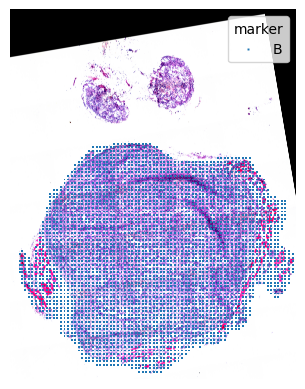

In [19]:
image = plt.imread('aligned_he646_image.png')
plt.imshow(image)

plt.axis('off')
plot_data = fdata[fdata.obs.marker == 'B'].copy()

posX = (plot_data.obsm['spatial'][:, 0].max() - plot_data.obsm['spatial'][:, 0]) / 1.35 + 200
posY = (plot_data.obsm['spatial'][:, 1].max() - plot_data.obsm['spatial'][:, 1]) / 1.35 + 2800

sns.scatterplot(x=posX, y=posY, hue=plot_data.obs['marker'], s=2, edgecolor='none', marker='s')
plt.show()

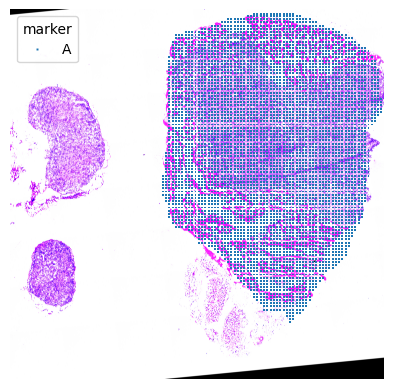

In [32]:
image = plt.imread('aligned_he647_image.png')
plt.imshow(image)
plt.axis('off')
plot_data = fdata[fdata.obs.marker == 'A'].copy()
posY = (plot_data.obsm['spatial'][:, 0].max() - plot_data.obsm['spatial'][:, 0]) / 1.35 + 100
posX = plot_data.obsm['spatial'][:, 1] / 1.32 + 100
sns.scatterplot(x=posX, y=posY, hue=plot_data.obs['marker'], s=2, edgecolor='none', marker='s')
plt.show()


{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': '0d5f111a-897b-4752-b186-38be332eabc6', 'geometry': {'type': 'Polygon', 'coordinates': [[[960, 5301], [960, 5307], [849, 5318], [821, 5318], [810, 5324], [794, 5324], [782, 5329], [766, 5335], [755, 5340], [744, 5346], [727, 5351], [721, 5357], [716, 5357], [699, 5362], [694, 5368], [682, 5374], [677, 5379], [671, 5385], [666, 5390], [660, 5390], [655, 5396], [649, 5401], [621, 5424], [616, 5424], [616, 5429], [610, 5429], [610, 5435], [605, 5435], [605, 5440], [599, 5446], [594, 5446], [577, 5485], [577, 5490], [571, 5496], [571, 5501], [571, 5507], [571, 5546], [571, 5551], [577, 5551], [571, 5568], [544, 5646], [494, 5746], [494, 5751], [538, 5873], [505, 5957], [505, 5962], [499, 5968], [499, 5973], [499, 5979], [499, 5985], [471, 6057], [471, 6062], [438, 6140], [427, 6218], [427, 6223], [405, 6296], [405, 6301], [399, 6329], [399, 6334], [399, 6379], [399, 6384], [394, 6384], [394, 6390], [388, 6418], [388, 6423

<Axes: >

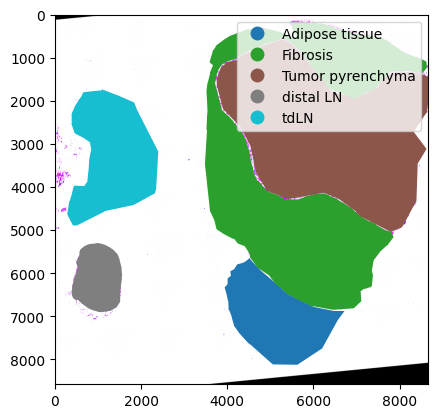

In [33]:
from PIL import Image
import geo
import geopandas as gpd

geos = geo.GEO('aligned_he647_image(3).geojson')
img = Image.open('aligned_he647_image.png')

def plot_geo(img):
    gdf= gpd.GeoDataFrame.from_features(geos.geo_json['features'])
    background = img.convert("RGBA")
    _, ax = plt.subplots()
    gdf.plot(ax=ax,column="name", legend=True)  # 假设GeoJSON包含多边形，我们绘制其边界
    ax.imshow(background)
    return ax

plot_geo(img)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': '2f9cbb82-b7a5-458b-aad1-2f470f9565da', 'geometry': {'type': 'Polygon', 'coordinates': [[[3610, 907], [3047, 957], [3041, 957], [2703, 1625], [2803, 1763], [2910, 2013], [2922, 2013], [2928, 2019], [2935, 2025], [2941, 2025], [3391, 2213], [3835, 1994], [3835, 1988], [3841, 1988], [3910, 1369], [3616, 913], [3616, 907], [3610, 907]]]}, 'properties': {'objectType': 'annotation', 'name': 'tdLN', 'color': [0, 0, 255]}}, {'type': 'Feature', 'id': '72c6bf34-ef04-4343-9d89-941ed2d98793', 'geometry': {'type': 'Polygon', 'coordinates': [[[1715, 968], [1516, 1307], [1422, 1775], [1597, 2200], [1991, 2413], [1997, 2413], [2566, 2419], [2566, 2413], [2612, 1355], [1715, 968]]]}, 'properties': {'objectType': 'annotation', 'name': 'distal LN', 'color': [0, 128, 128]}}, {'type': 'Feature', 'id': '94d94f5e-89b4-42f5-b4b4-11fa18c11c78', 'geometry': {'type': 'Polygon', 'coordinates': [[[2949, 2755], [3401, 3100], [4838, 3527], [5215, 

<Axes: >

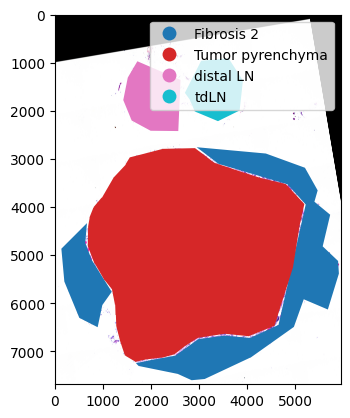

In [34]:
from PIL import Image
import geo
geos = geo.GEO('aligned_he646_image(3).geojson')
img = Image.open('aligned_he646_image.png')
geos.plot_geo(img)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': '2f9cbb82-b7a5-458b-aad1-2f470f9565da', 'geometry': {'type': 'Polygon', 'coordinates': [[[3610, 907], [3047, 957], [3041, 957], [2703, 1625], [2803, 1763], [2910, 2013], [2922, 2013], [2928, 2019], [2935, 2025], [2941, 2025], [3391, 2213], [3835, 1994], [3835, 1988], [3841, 1988], [3910, 1369], [3616, 913], [3616, 907], [3610, 907]]]}, 'properties': {'objectType': 'annotation', 'name': 'tdLN', 'color': [0, 0, 255]}}, {'type': 'Feature', 'id': '72c6bf34-ef04-4343-9d89-941ed2d98793', 'geometry': {'type': 'Polygon', 'coordinates': [[[1715, 968], [1516, 1307], [1422, 1775], [1597, 2200], [1991, 2413], [1997, 2413], [2566, 2419], [2566, 2413], [2612, 1355], [1715, 968]]]}, 'properties': {'objectType': 'annotation', 'name': 'distal LN', 'color': [0, 128, 128]}}, {'type': 'Feature', 'id': '94d94f5e-89b4-42f5-b4b4-11fa18c11c78', 'geometry': {'type': 'Polygon', 'coordinates': [[[2949, 2755], [3401, 3100], [4838, 3527], [5215, 

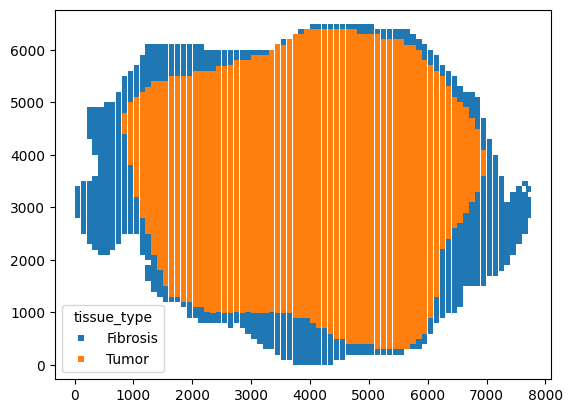

In [40]:
from PIL import Image
import geo
geos = geo.GEO('aligned_he646_image(3).geojson')
img = Image.open('aligned_he646_image.png')

plot_data_b = fdata[fdata.obs.marker == 'B'].copy()

# 获取每个bin的位置
posX = ((plot_data_b.obsm['spatial'][:, 0].max() - plot_data_b.obsm['spatial'][:, 0]) / 1.35 + 200) / 224
posY = ((plot_data_b.obsm['spatial'][:, 1].max() - plot_data_b.obsm['spatial'][:, 1]) / 1.35 + 2800) / 224

# 判断每个bin是否在各个区域内
plot_data_b.obs['tissue_type'] = [','.join(geos.judge_patch(x, y)) if geos.judge_patch(x, y) else 'Unknown' 
                               for x,y in zip(posX, posY)]

plot_data_b.obs['tissue_type'] = plot_data_b.obs['tissue_type'].map(lambda x: 'Tumor' if 'Tumor' in x else 'Fibrosis' if 'Fibrosis' in x else 'Fibrosis')
# 可视化结果
# geos.plot_geo(img)
sns.scatterplot(x=plot_data_b.obsm['spatial'][:, 0], y=plot_data_b.obsm['spatial'][:, 1],
                hue=plot_data_b.obs['tissue_type'], s=15, edgecolor='none', marker='s')
plt.show()

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': '0d5f111a-897b-4752-b186-38be332eabc6', 'geometry': {'type': 'Polygon', 'coordinates': [[[960, 5301], [960, 5307], [849, 5318], [821, 5318], [810, 5324], [794, 5324], [782, 5329], [766, 5335], [755, 5340], [744, 5346], [727, 5351], [721, 5357], [716, 5357], [699, 5362], [694, 5368], [682, 5374], [677, 5379], [671, 5385], [666, 5390], [660, 5390], [655, 5396], [649, 5401], [621, 5424], [616, 5424], [616, 5429], [610, 5429], [610, 5435], [605, 5435], [605, 5440], [599, 5446], [594, 5446], [577, 5485], [577, 5490], [571, 5496], [571, 5501], [571, 5507], [571, 5546], [571, 5551], [577, 5551], [571, 5568], [544, 5646], [494, 5746], [494, 5751], [538, 5873], [505, 5957], [505, 5962], [499, 5968], [499, 5973], [499, 5979], [499, 5985], [471, 6057], [471, 6062], [438, 6140], [427, 6218], [427, 6223], [405, 6296], [405, 6301], [399, 6329], [399, 6334], [399, 6379], [399, 6384], [394, 6384], [394, 6390], [388, 6418], [388, 6423

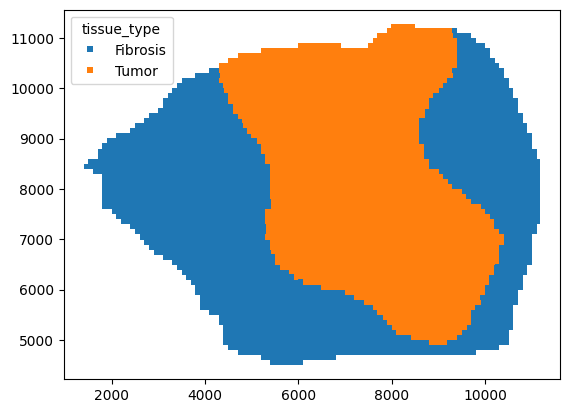

In [42]:
from PIL import Image
import geo
geos = geo.GEO('aligned_he647_image(3).geojson')
img = Image.open('aligned_he647_image.png')

plot_data_a = fdata[fdata.obs.marker == 'A'].copy()

# 获取每个bin的位置
posY = ((plot_data_a.obsm['spatial'][:, 0].max() - plot_data_a.obsm['spatial'][:, 0]) / 1.35 + 100) / 224
posX = (plot_data_a.obsm['spatial'][:, 1] / 1.32 + 100) / 224

# 判断每个bin是否在各个区域内
plot_data_a.obs['tissue_type'] = [','.join(geos.judge_patch(x, y)) if geos.judge_patch(x, y) else 'Unknown' 
                               for x,y in zip(posX, posY)]

plot_data_a.obs['tissue_type'] = plot_data_a.obs['tissue_type'].map(lambda x: 'Tumor' if 'Tumor' in x else 'Fibrosis' if 'Fibrosis' in x else 'Fibrosis')
# 可视化结果
# geos.plot_geo(img)
sns.scatterplot(x=plot_data_a.obsm['spatial'][:, 0], y=plot_data_a.obsm['spatial'][:, 1],
                hue=plot_data_a.obs['tissue_type'], s=15, edgecolor='none', marker='s')
plt.show()

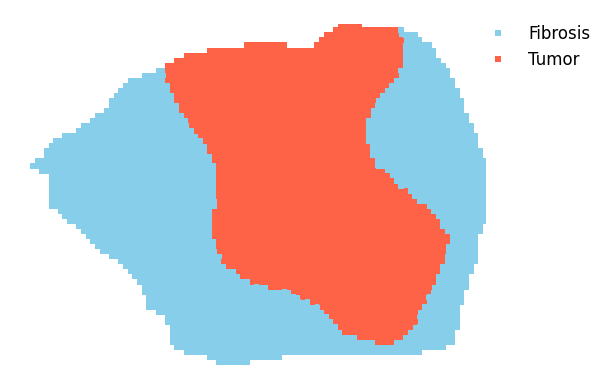

In [49]:
# geos.plot_geo(img)
sns.scatterplot(x=plot_data_a.obsm['spatial'][:, 0], y=plot_data_a.obsm['spatial'][:, 1],
                hue=plot_data_a.obs['tissue_type'], s=15, edgecolor='none', marker='s', palette=['skyblue', 'tomato'])
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.legend(title='', loc='upper right', frameon=False, bbox_to_anchor=(1.2, 1), fontsize=12)
sns.despine(left=True, bottom=True)
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/tumor_fibro_mapping_he_A.pdf', bbox_inches='tight')
plt.show()


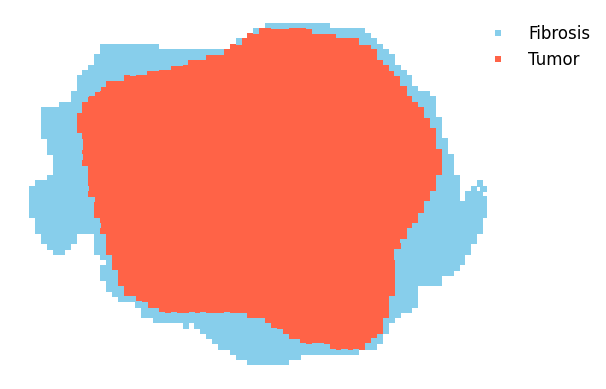

In [51]:
# geos.plot_geo(img)
sns.scatterplot(x=plot_data_b.obsm['spatial'][:, 0], y=plot_data_b.obsm['spatial'][:, 1],
                hue=plot_data_b.obs['tissue_type'], s=20, edgecolor='none', marker='s', palette=['skyblue', 'tomato'])
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.legend(title='', loc='upper right', frameon=False, bbox_to_anchor=(1.2, 1), fontsize=12)
sns.despine(left=True, bottom=True)
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/tumor_fibro_mapping_he_B.pdf', bbox_inches='tight')
plt.show()


In [57]:
merge_data = sc.concat([plot_data_a, plot_data_b])
merge_data.write_h5ad('./he_annotate_merge.h5')

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


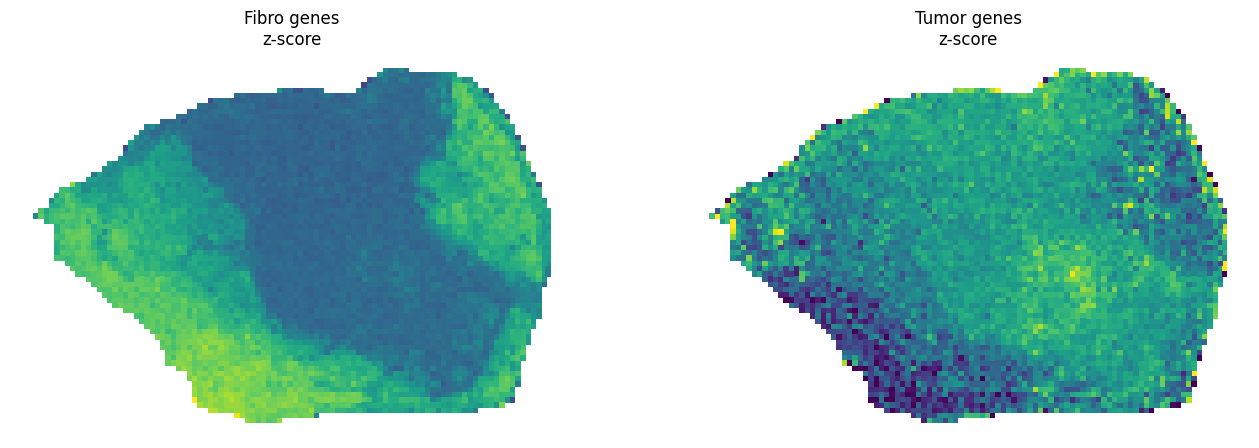

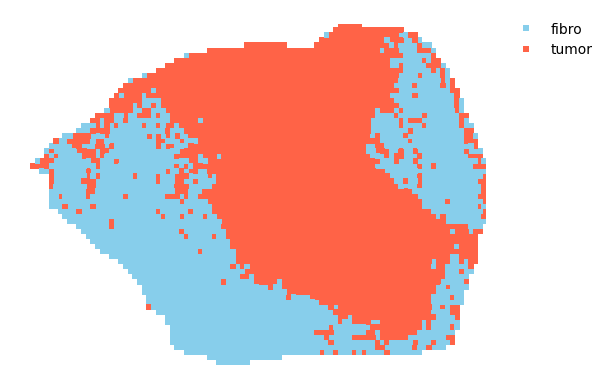

In [52]:
import numpy as np
plot_data = fdata[(fdata.obs.marker == 'A') & (fdata.obsm['spatial'][:, 1] > 4000)]

fibro_genes = ['Tpm1', 'Acta1', 'Myh4', 'Tnnt3']
tumor_genes = ['Spp1', 'C1qa', 'H2-K1', 'Lgals1', 'S100a6']

sc.tl.score_genes(plot_data, fibro_genes, score_name='fibro_score')
sc.tl.score_genes(plot_data, tumor_genes, score_name='tumor_score')

plot_data.obs['tumor_score'] = (plot_data.obs['tumor_score'] - np.mean(plot_data.obs['tumor_score'])) / np.std(plot_data.obs['tumor_score'])
plot_data.obs['fibro_score'] = (plot_data.obs['fibro_score'] - np.mean(plot_data.obs['fibro_score'])) / np.std(plot_data.obs['fibro_score'])

_, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                c=plot_data.obs['fibro_score'], cmap='viridis', s=15, edgecolor='none', marker='s', ax=ax[0], vmax=3, vmin=-3)
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                c=plot_data.obs['tumor_score'], cmap='viridis', s=15, edgecolor='none', marker='s', ax=ax[1], vmax=3, vmin=-3)
sns.despine(ax=ax[0], left=True, bottom=True)
sns.despine(ax=ax[1], left=True, bottom=True)

ax[0].set_title('Fibro genes\nz-score')
ax[1].set_title('Tumor genes\nz-score')

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/tumor_fibro_mapping_A_signature.pdf', bbox_inches='tight')
plt.show()

plot_data.obs['tissue'] = (plot_data.obs['tumor_score'] > plot_data.obs['fibro_score']).map({True: 'tumor', False: 'fibro'})
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                hue=plot_data.obs['tissue'], s=15, edgecolor='none', marker='s', legend=True, palette=['skyblue', 'tomato'])
plt.xticks([])
plt.yticks([])
plt.legend(title='', loc='upper right', frameon=False, bbox_to_anchor=(1.2, 1))
sns.despine(left=True, bottom=True)
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/tumor_fibro_mapping_A.pdf', bbox_inches='tight')
plt.show()


/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


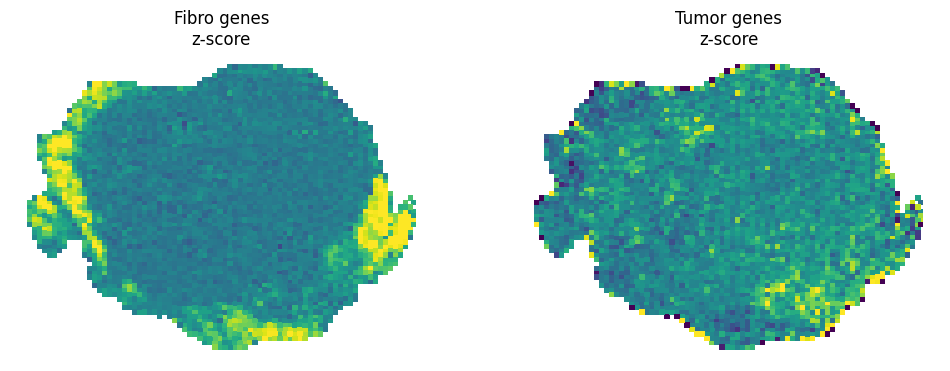

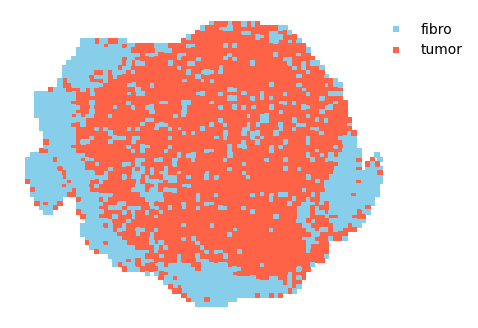

In [53]:
import numpy as np
plot_data = fdata[(fdata.obs.marker == 'B') & (fdata.obsm['spatial'][:, 1] < 6500)]

fibro_genes = ['Tpm1', 'Acta1', 'Myh4', 'Tnnt3']
tumor_genes = ['Spp1', 'C1qa', 'H2-K1', 'Lgals1', 'S100a6']

sc.tl.score_genes(plot_data, fibro_genes, score_name='fibro_score')
sc.tl.score_genes(plot_data, tumor_genes, score_name='tumor_score')

plot_data.obs['tumor_score'] = (plot_data.obs['tumor_score'] - np.mean(plot_data.obs['tumor_score'])) / np.std(plot_data.obs['tumor_score'])
plot_data.obs['fibro_score'] = (plot_data.obs['fibro_score'] - np.mean(plot_data.obs['fibro_score'])) / np.std(plot_data.obs['fibro_score'])

_, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                c=plot_data.obs['fibro_score'], cmap='viridis', s=15, edgecolor='none', marker='s', ax=ax[0], vmax=3, vmin=-3)
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                c=plot_data.obs['tumor_score'], cmap='viridis', s=15, edgecolor='none', marker='s', ax=ax[1], vmax=3, vmin=-3)
sns.despine(ax=ax[0], left=True, bottom=True)
sns.despine(ax=ax[1], left=True, bottom=True)

ax[0].set_title('Fibro genes\nz-score')
ax[1].set_title('Tumor genes\nz-score')

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/tumor_fibro_mapping_B_signature.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(5, 4))
plot_data.obs['tissue'] = (plot_data.obs['tumor_score'] > plot_data.obs['fibro_score']).map({True: 'tumor', False: 'fibro'})
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                hue=plot_data.obs['tissue'], s=15, edgecolor='none', marker='s', legend=True, palette=['skyblue', 'tomato'])
plt.xticks([])
plt.yticks([])
plt.legend(title='', loc='upper right', frameon=False, bbox_to_anchor=(1.2, 1))
sns.despine(left=True, bottom=True)
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/tumor_fibro_mapping_B.pdf', bbox_inches='tight')
plt.show()
